## Investigando las características estacionales de las series temporales financieras con la ayuda de diagramas Boxplot

https://bbnb.media/noticias/python-for-at/hablemos-de-pautas-estacionales-y-donde-encontrarlas/

### Import necesary libraries

In [2]:
from datetime import date
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn; seaborn.set()
import quantstats as qs
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import numpy as np
import yfinance as yf
import talib
import datetime

### Descarga de Datos y Grafico de Quartiles Mensuales (incrementos mensuales medios por años)

[*********************100%***********************]  1 of 1 completed


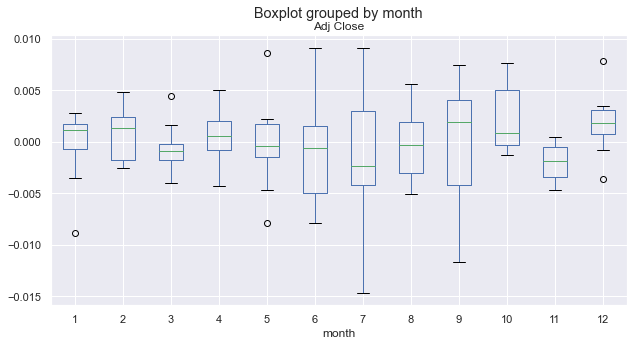

In [3]:
start_date ='2010-01-01' #'1993-01-01'
today = date.today()
end_date = today.strftime("%Y-%m-%d")
data = yf.download("ZC=F", start=start_date, end=end_date)
data.drop(['Open', 'Low', 'High', 'Volume', 'Close'], axis=1)

# get percent change (price returns)
returns = pd.DataFrame(np.log(1 + data['Adj Close'].pct_change(1)))

returns = returns.set_index(data.index)
returns = returns[1:]
returns.head(5)

Monthly_Returns = returns.groupby([returns.index.year.rename('year'), returns.index.month.rename('month')]).mean()
Monthly_Returns.boxplot(column='Adj Close', by='month', figsize=(10, 5))

### Distribución de los incrementos de precio en cada día de la semana por separado

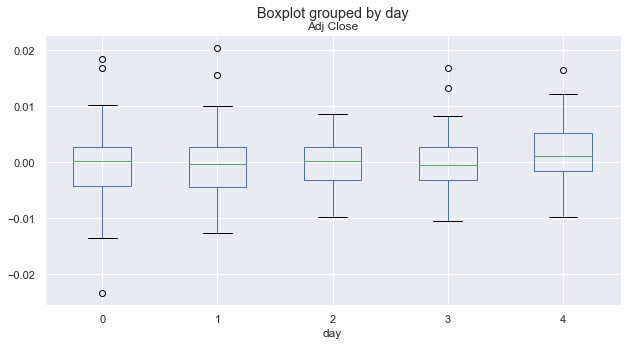

In [4]:
Daily_Returns = returns.groupby([returns.index.week.rename('week'), returns.index.dayofweek.rename('day')]).mean()
Daily_Returns.boxplot(column='Adj Close', by='day', figsize=(10, 5))

### Intervalos medios del incremento de precio por días comerciales (enero).

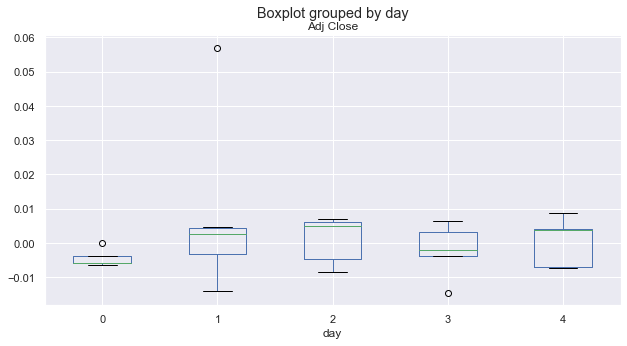

In [5]:
# leave only one month "returns.index[~returns.index.month.isin([1])"
returns = returns.drop(returns.index[~returns.index.month.isin([6])])
Daily_Returns = returns.groupby([returns.index.week.rename('week'), returns.index.dayofweek.rename('day')]).mean()
Daily_Returns.boxplot(column='Adj Close', by='day', figsize=(10, 5))

### Intervalos medios del incremento de precio por días comerciales (Octubre).

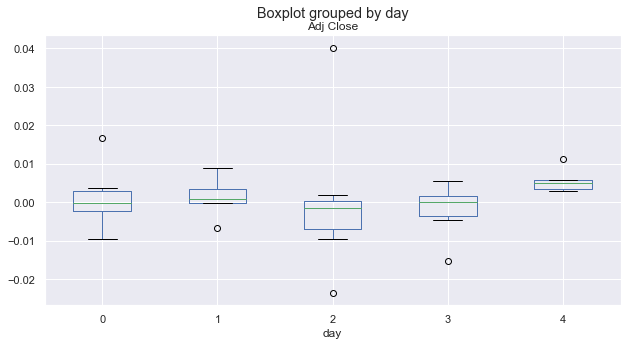

In [8]:
returns = pd.DataFrame(np.log(1 + data['Adj Close'].pct_change(1)))
returns = returns.set_index(data.index)
returns = returns[1:]
# leave only one month "returns.index[~returns.index.month.isin([1])"
returns = returns.drop(returns.index[~returns.index.month.isin([12])])
Daily_Returns = returns.groupby([returns.index.week.rename('week'), returns.index.dayofweek.rename('day')]).mean()
Daily_Returns.boxplot(column='Adj Close', by='day', figsize=(10, 5))

### Buscando regularidades estacionales con eliminación de tendencias según una media móvil

[*********************100%***********************]  1 of 1 completed


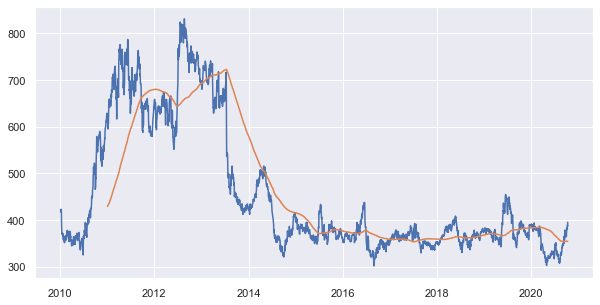

In [24]:
start_date ='2010-01-01' #'1993-01-01'
today = date.today()
end_date = today.strftime("%Y-%m-%d")
data2 = yf.download("ZC=F", start=start_date, end=end_date)
data2.drop(['Open', 'Low', 'High', 'Volume', 'Close'], axis=1)
# set the moving average period
window = 253
# detrend tome series by MA
ratesM = data2['Adj Close'].rolling(window).mean()
ratesD = data2['Adj Close'][window:] - ratesM[window:]

plt.figure(figsize=(10, 5))
plt.plot(data['Adj Close'])
plt.plot(ratesM)

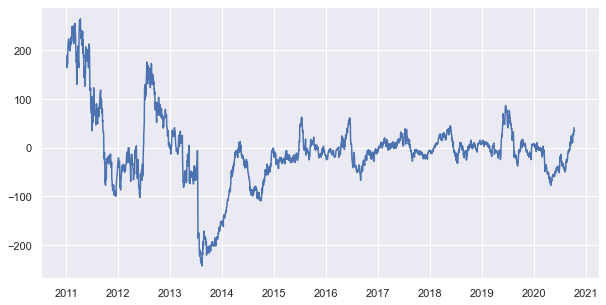

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(ratesD)

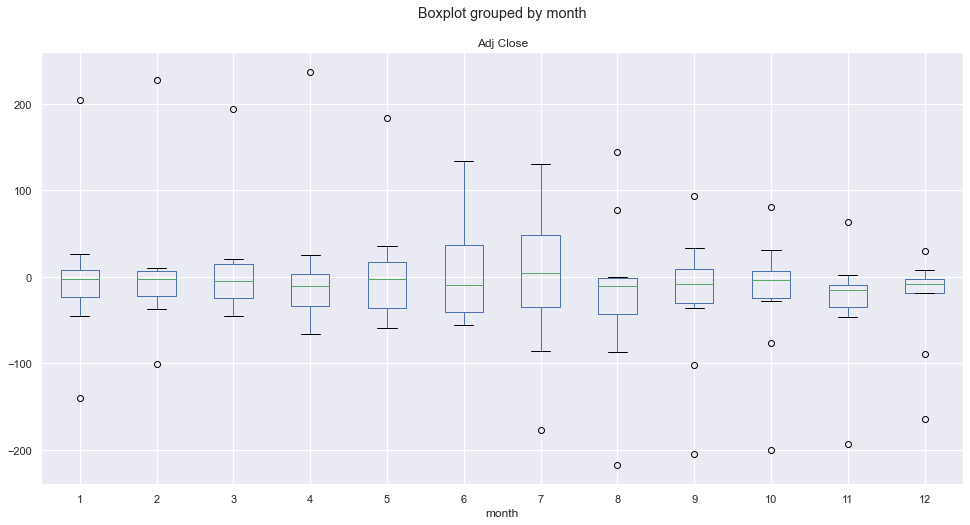

In [26]:
Monthly_Returns = ratesD.groupby([ratesD.index.year.rename('year'), ratesD.index.month.rename('month')]).median()
Monthly_Returns  = pd.DataFrame(Monthly_Returns)
Monthly_Returns.boxplot(column='Adj Close', by='month', figsize=(16, 8))

## Seasonal Decompose

In [19]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data2['Adj Close'], model="additive", period = 253)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

### Plot gathered statistics

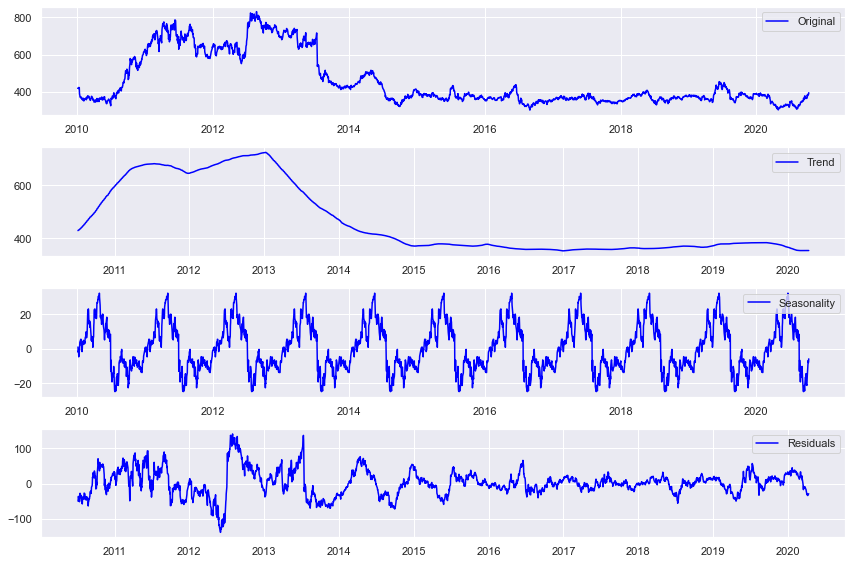

In [20]:

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data['Adj Close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

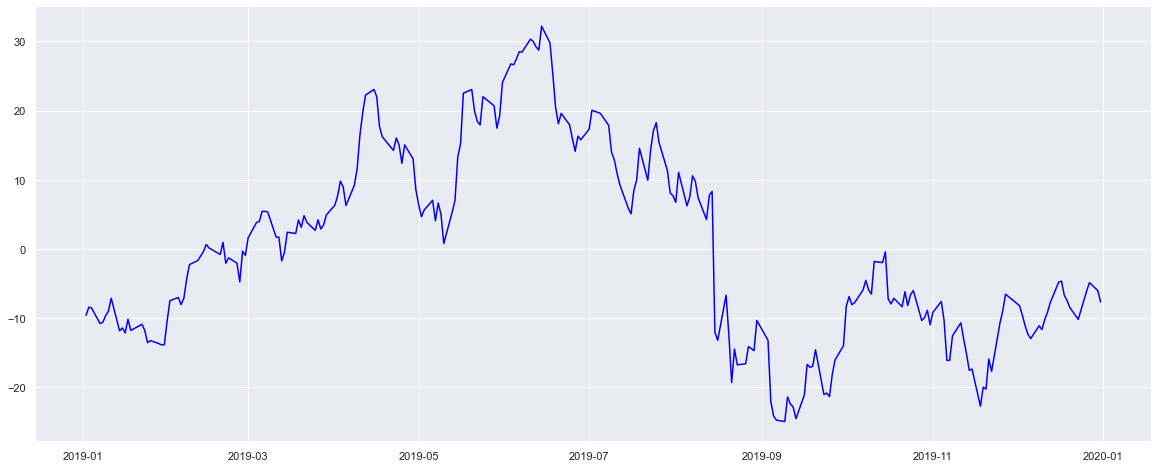

In [27]:

import pandas as pd
from datetime import date

date_from = pd.Timestamp(date(2019,1,1))
date_to = pd.Timestamp(date(2020,1,1))

df = seasonal[
    (seasonal.index > date_from ) &
    (seasonal.index < date_to)
]

plt.figure(figsize=(20,8))
plt.plot(df,label='Seasonality', color="blue")
plt.grid = True

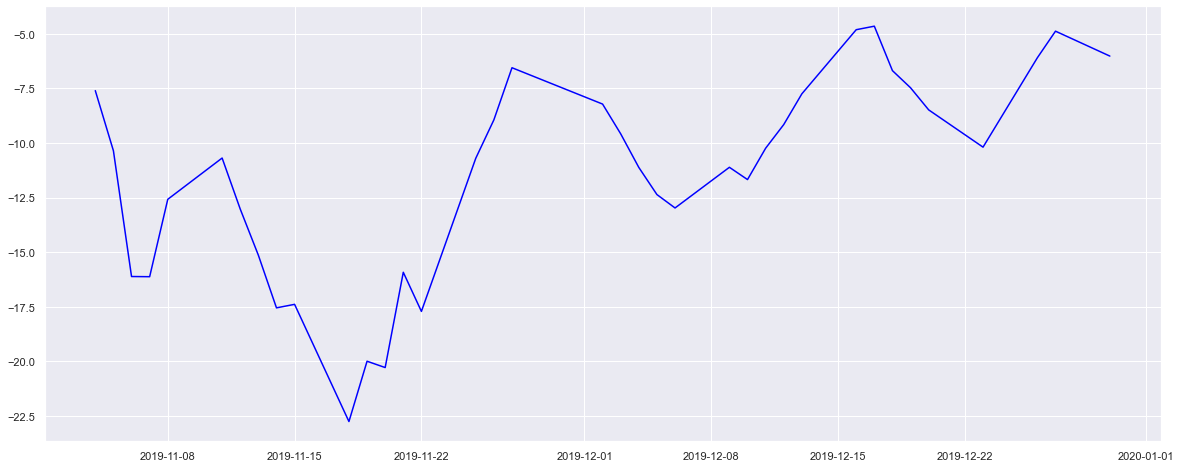

In [28]:
date_from = pd.Timestamp(date(2019,11,1))
date_to = pd.Timestamp(date(2019,12,31))

df = seasonal[
    (seasonal.index > date_from ) &
    (seasonal.index < date_to)
]

plt.figure(figsize=(20,8))
plt.plot(df,label='Seasonality', color="blue")
plt.grid = True